## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [5]:
import os
import keras

In [6]:
train, test = keras.datasets.cifar10.load_data()

In [7]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [8]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.regularizers import l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = Input(input_shape)
    x = Dense(units=num_neurons[0],
              activation=None,
              name='hidden_layer_0',
              kernel_regularizer=l1_l2(1e-12,1e-12))(input_layer)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    for i, neurons in enumerate(num_neurons):
        x = Dense(units=neurons,
                  activation=None,
                  name='hidden_layer_{0}'.format(str(i+1)),
                  kernel_regularizer=l1_l2(1e-12,1e-12))(x)
        x = Activation('relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(0.2)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [10]:
LEARNING_RATE = 1e-4
EPOCHS = 100
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [11]:
from keras.callbacks import ModelCheckpoint

model_ckpt = ModelCheckpoint(filepath="./tmp.h5", 
                             monitor="val_loss", 
                             save_best_only=True,
                             save_weights_only=True)

In [12]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[model_ckpt]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

W0725 20:30:21.776957  9848 deprecation_wrapper.py:119] From C:\Users\Scherzando\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0725 20:30:21.830960  9848 deprecation_wrapper.py:119] From C:\Users\Scherzando\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0725 20:30:21.836962  9848 deprecation_wrapper.py:119] From C:\Users\Scherzando\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0725 20:30:21.909566  9848 deprecation_wrapper.py:119] From C:\Users\Scherzando\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0725 20:30:21.924571  984

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer_0 (Dense)       (None, 512)               1573376   
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
__________

50000/50000 [==============================] - 2s 38us/step - loss: 1.8313 - acc: 0.3646 - val_loss: 1.6334 - val_acc: 0.4239
Epoch 41/100
50000/50000 [==============================] - 2s 39us/step - loss: 1.8287 - acc: 0.3661 - val_loss: 1.6270 - val_acc: 0.4233
Epoch 42/100
50000/50000 [==============================] - 2s 38us/step - loss: 1.8124 - acc: 0.3732 - val_loss: 1.6236 - val_acc: 0.4254
Epoch 43/100
50000/50000 [==============================] - 2s 39us/step - loss: 1.8160 - acc: 0.3700 - val_loss: 1.6180 - val_acc: 0.4274
Epoch 44/100
50000/50000 [==============================] - 2s 39us/step - loss: 1.8061 - acc: 0.3741 - val_loss: 1.6178 - val_acc: 0.4270
Epoch 45/100
50000/50000 [==============================] - 2s 39us/step - loss: 1.8002 - acc: 0.3744 - val_loss: 1.6167 - val_acc: 0.4288
Epoch 46/100
50000/50000 [==============================] - 2s 38us/step - loss: 1.7933 - acc: 0.3778 - val_loss: 1.6108 - val_acc: 0.4263
Epoch 47/100
50000/50000 [==============

50000/50000 [==============================] - 2s 40us/step - loss: 1.6172 - acc: 0.4265 - val_loss: 1.5021 - val_acc: 0.4675
Epoch 100/100
50000/50000 [==============================] - 2s 41us/step - loss: 1.6128 - acc: 0.4320 - val_loss: 1.4985 - val_acc: 0.4665


In [13]:
model = build_mlp(input_shape=x_train.shape[1:])
model.load_weights('./tmp.h5')

optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[model_ckpt]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 70us/step - loss: 1.6098 - acc: 0.4300 - val_loss: 1.4965 - val_acc: 0.4679
Epoch 2/100
50000/50000 [==============================] - 2s 42us/step - loss: 1.6064 - acc: 0.4311 - val_loss: 1.4968 - val_acc: 0.4676
Epoch 3/100
50000/50000 [==============================] - 2s 43us/step - loss: 1.6063 - acc: 0.4333 - val_loss: 1.4960 - val_acc: 0.4684
Epoch 4/100
50000/50000 [==============================] - 2s 42us/step - loss: 1.6030 - acc: 0.4311 - val_loss: 1.4930 - val_acc: 0.4688
Epoch 5/100
50000/50000 [==============================] - 2s 41us/step - loss: 1.5952 - acc: 0.4358 - val_loss: 1.4929 - val_acc: 0.4678
Epoch 6/100
50000/50000 [==============================] - 2s 40us/step - loss: 1.5922 - acc: 0.4378 - val_loss: 1.4879 - val_acc: 0.4723
Epoch 7/100
50000/50000 [==============================] - 2s 40us/step - loss: 1.6026 - acc: 0.4328 - val_loss: 1.4890 - 

50000/50000 [==============================] - 2s 40us/step - loss: 1.5028 - acc: 0.4675 - val_loss: 1.4378 - val_acc: 0.4888
Epoch 60/100
50000/50000 [==============================] - 2s 40us/step - loss: 1.5036 - acc: 0.4662 - val_loss: 1.4383 - val_acc: 0.4877
Epoch 61/100
50000/50000 [==============================] - 2s 40us/step - loss: 1.5052 - acc: 0.4639 - val_loss: 1.4395 - val_acc: 0.4886
Epoch 62/100
50000/50000 [==============================] - 2s 41us/step - loss: 1.5006 - acc: 0.4662 - val_loss: 1.4335 - val_acc: 0.4905
Epoch 63/100
50000/50000 [==============================] - 2s 40us/step - loss: 1.4982 - acc: 0.4667 - val_loss: 1.4339 - val_acc: 0.4877
Epoch 64/100
50000/50000 [==============================] - 2s 40us/step - loss: 1.5028 - acc: 0.4664 - val_loss: 1.4335 - val_acc: 0.4861
Epoch 65/100
50000/50000 [==============================] - 2s 40us/step - loss: 1.4967 - acc: 0.4675 - val_loss: 1.4346 - val_acc: 0.4860
Epoch 66/100
50000/50000 [==============

In [17]:
loss_loadback, acc_loadback = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 80us/step


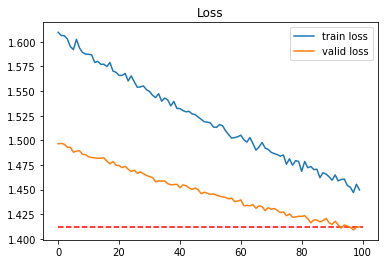

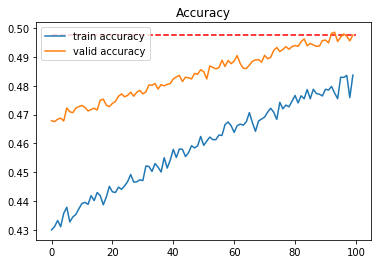

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.hlines(y=loss_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.hlines(y=acc_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title("Accuracy")
plt.show()
